In [1]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt

In [2]:
def ThreeBody(y, t, M):
    equations = np.empty((12, ))
    
    # Radii
    R12 = np.sqrt((y[0]-y[4])**2+(y[1]-y[5])**2)
    R13 = np.sqrt((y[0]-y[8])**2+(y[1]-y[9])**2)
    R23 = np.sqrt((y[4]-y[8])**2+(y[5]-y[9])**2)
    
    # Mass 0
    equations[0] = y[2]
    equations[1] = y[3]
    equations[2] = G*M[1]*(y[4]-y[0])/(R12**3)+G*M[2]*(y[8]-y[0])/(R13**3)
    equations[3] = G*M[1]*(y[5]-y[1])/(R12**3)+G*M[2]*(y[9]-y[1])/(R13**3)
    
    # Mass 1
    equations[4] = y[6]
    equations[5] = y[7]
    equations[6] = G*M[0]*(y[0]-y[4])/(R12**3)+G*M[2]*(y[8]-y[4])/(R23**3)
    equations[7] = G*M[0]*(y[1]-y[5])/(R12**3)+G*M[2]*(y[9]-y[5])/(R23**3)
    
    # Mass 2
    equations[8] = y[10]
    equations[9] = y[11]
    equations[10] = G*M[0]*(y[0]-y[8])/(R13**3)+G*M[1]*(y[4]-y[8])/(R23**3)
    equations[11] = G*M[0]*(y[1]-y[9])/(R13**3)+G*M[1]*(y[5]-y[9])/(R23**3)
    
    return equations

In [3]:
def get_sample():
    M = np.random.rand(3)
    Y0 = np.random.rand(12) * 2 - np.ones(12)
    T = np.arange(0, MAX_TIME+DT, DT)
    solution = odeint(ThreeBody, Y0, T, (M, ))
    return np.concatenate((M, Y0 * SCALE)) , solution * SCALE

In [4]:
def get_training_data(sample):
    IV = []
    solution = []
    for _ in range(sample):
        i, s = get_sample()
        IV.append(i)
        solution.append(s)
    return IV, solution

In [5]:
G = 0.6674
DT = 0.001
MAX_TIME = 1
SCALE = 0.1

In [6]:
train, label = get_training_data(100)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


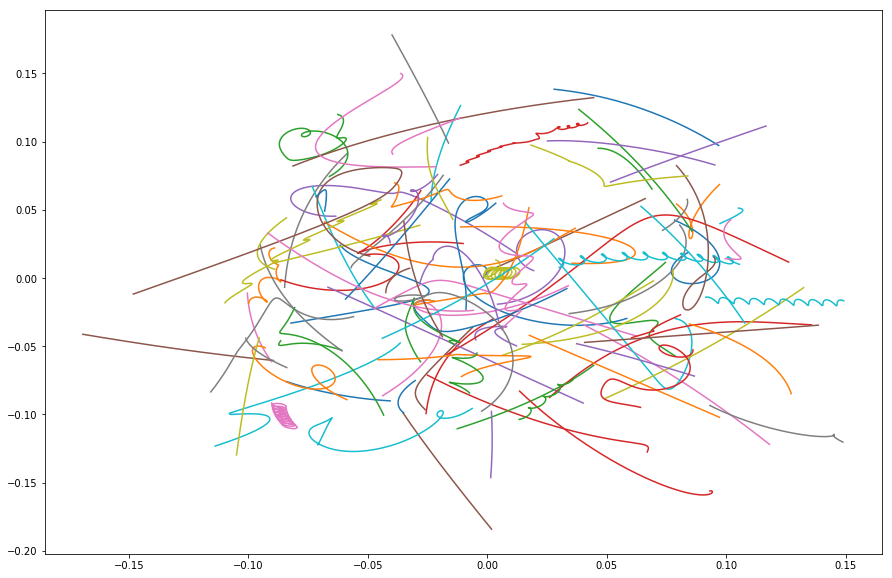

In [10]:
plt.figure(figsize=(15,10))
for path in label:
    plt.plot(path[:,0], path[:,1])

plt.show()